In [1]:
from os.path import join
import numpy as np
import nibabel as nib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# settings
subj_id = '784565'
exp_dir = '/home/agajan/experiment_DiffusionMRI/tractseg_data/'
data_path = join(exp_dir, subj_id, 'data.nii.gz')
mask_path = join(exp_dir, subj_id, 'nodif_brain_mask.nii.gz')

In [2]:
print("Loading data.")
data = nib.load(data_path).get_data()
mask = nib.load(mask_path).get_data()

print("Making data matrix")
coords = []
features = []
for x in range(145):
    for y in range(174):
        for z in range(145):
            if mask[x, y, z]:
                coords.append((x, y, z))
                features.append(data[x, y, z, :])

Loading data.
Making data matrix


In [3]:
print("Normalizing.")
features_norm = StandardScaler().fit_transform(features)

Normalizing.


In [4]:
print("Performing PCA.")
pca = PCA(random_state=0)
pca_norm = PCA(random_state=0)

Performing PCA.


In [5]:
red_feats = pca.fit_transform(features)
red_feats_norm = pca_norm.fit_transform(features_norm)

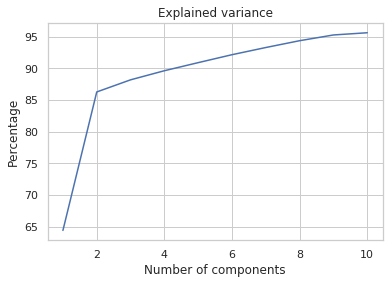

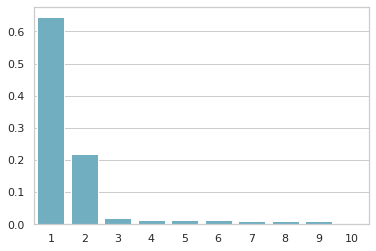

In [12]:
y = [sum(pca.explained_variance_ratio_[:i])*100 for i in range(1, 289)]
x = list(range(1, 289))
sns.set()
sns.set_style("whitegrid")
sns.lineplot(x[:10], y[:10])
# sns.scatterplot([22], cum_ratios[21], color='red', label="n_components=22")
plt.title("Explained variance")
plt.ylabel("Percentage")
plt.xlabel("Number of components")
plt.show()

sns.barplot(x[:10], pca.explained_variance_ratio_[:10], color="c")

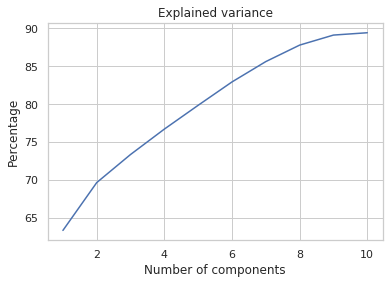

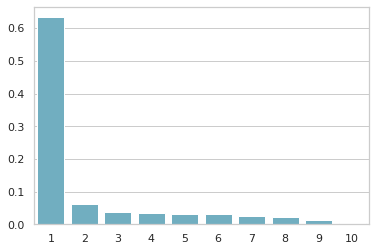

In [11]:
y = [sum(pca_norm.explained_variance_ratio_[:i])*100 for i in range(1, 289)]
x = list(range(1, 289))
sns.set()
sns.set_style("whitegrid")
sns.lineplot(x[:10], y[:10])
# sns.scatterplot([22], cum_ratios[21], color='red', label="n_components=22")
plt.title("Explained variance")
plt.ylabel("Percentage")
plt.xlabel("Number of components")
plt.show()

sns.barplot(x[:10], pca_norm.explained_variance_ratio_[:10], color="c")